Import Library

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.preprocessing import LabelEncoder

Load & Preparation Data

In [2]:
dataset_path = "/content/drive/MyDrive/Tugas Besar UAS AI/weatherHistory.csv"

In [4]:
data = pd.read_csv(dataset_path)
print("Data awal:")
data.head()

Data awal:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
print("\nInfo data:")
data.info()


Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Cek Missing Value

In [ ]:
print("\nMissing values per kolom:")
print(data.isnull().sum())


Missing values per kolom:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [ ]:
numeric_cols = ['Temperature (C)', 'Apparent Temperature (C)',
                'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']

In [ ]:
# Isi dengan median
for col in numeric_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

In [ ]:
# Untuk Precip Type, bisa diisi dengan "None" atau "No Precipitation"
data['Precip Type'] = data['Precip Type'].fillna('No Precipitation')

In [ ]:
# Untuk Summary dan Daily Summary, bisa diisi dengan mode
data['Summary'] = data['Summary'].fillna(data['Summary'].mode()[0])
data['Daily Summary'] = data['Daily Summary'].fillna(data['Daily Summary'].mode()[0])

In [ ]:
# Verifikasi tidak ada missing values lagi
print("Missing values setelah cleaning:")
print(data.isnull().sum())

Missing values setelah cleaning:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


ENCODING

In [24]:
# Membagi 2 data dengan nilai 'rain' atau 'snow'
data = data[data['Precip Type'].isin(['rain', 'snow'])]

In [25]:
# Inisialisasi dan fit LabelEncoder
le = LabelEncoder()
data['Precip Type Encoded'] = le.fit_transform(data['Precip Type'])

PISAHKAN FITUR DAN TARGET

In [26]:
# Drop non-numeric columns that are not suitable for the model
X = data.drop(['Precip Type', 'Precip Type Encoded', 'Formatted Date', 'Summary', 'Daily Summary'], axis=1)
y = data['Precip Type Encoded']

Split Data (Training dan Testing)

In [27]:
print("Distribusi label di seluruh dataset:")
print(y.value_counts(normalize=True))

Distribusi label di seluruh dataset:
Precip Type Encoded
0    0.888342
1    0.111658
Name: proportion, dtype: float64


In [28]:
# Bagi data: 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Cek distribusi label setelah dibagi menjadi dua bagian
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji   :", X_test.shape[0])

Jumlah data latih: 76748
Jumlah data uji   : 19188


 Exploratory Data Analysis (EDA)

In [30]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

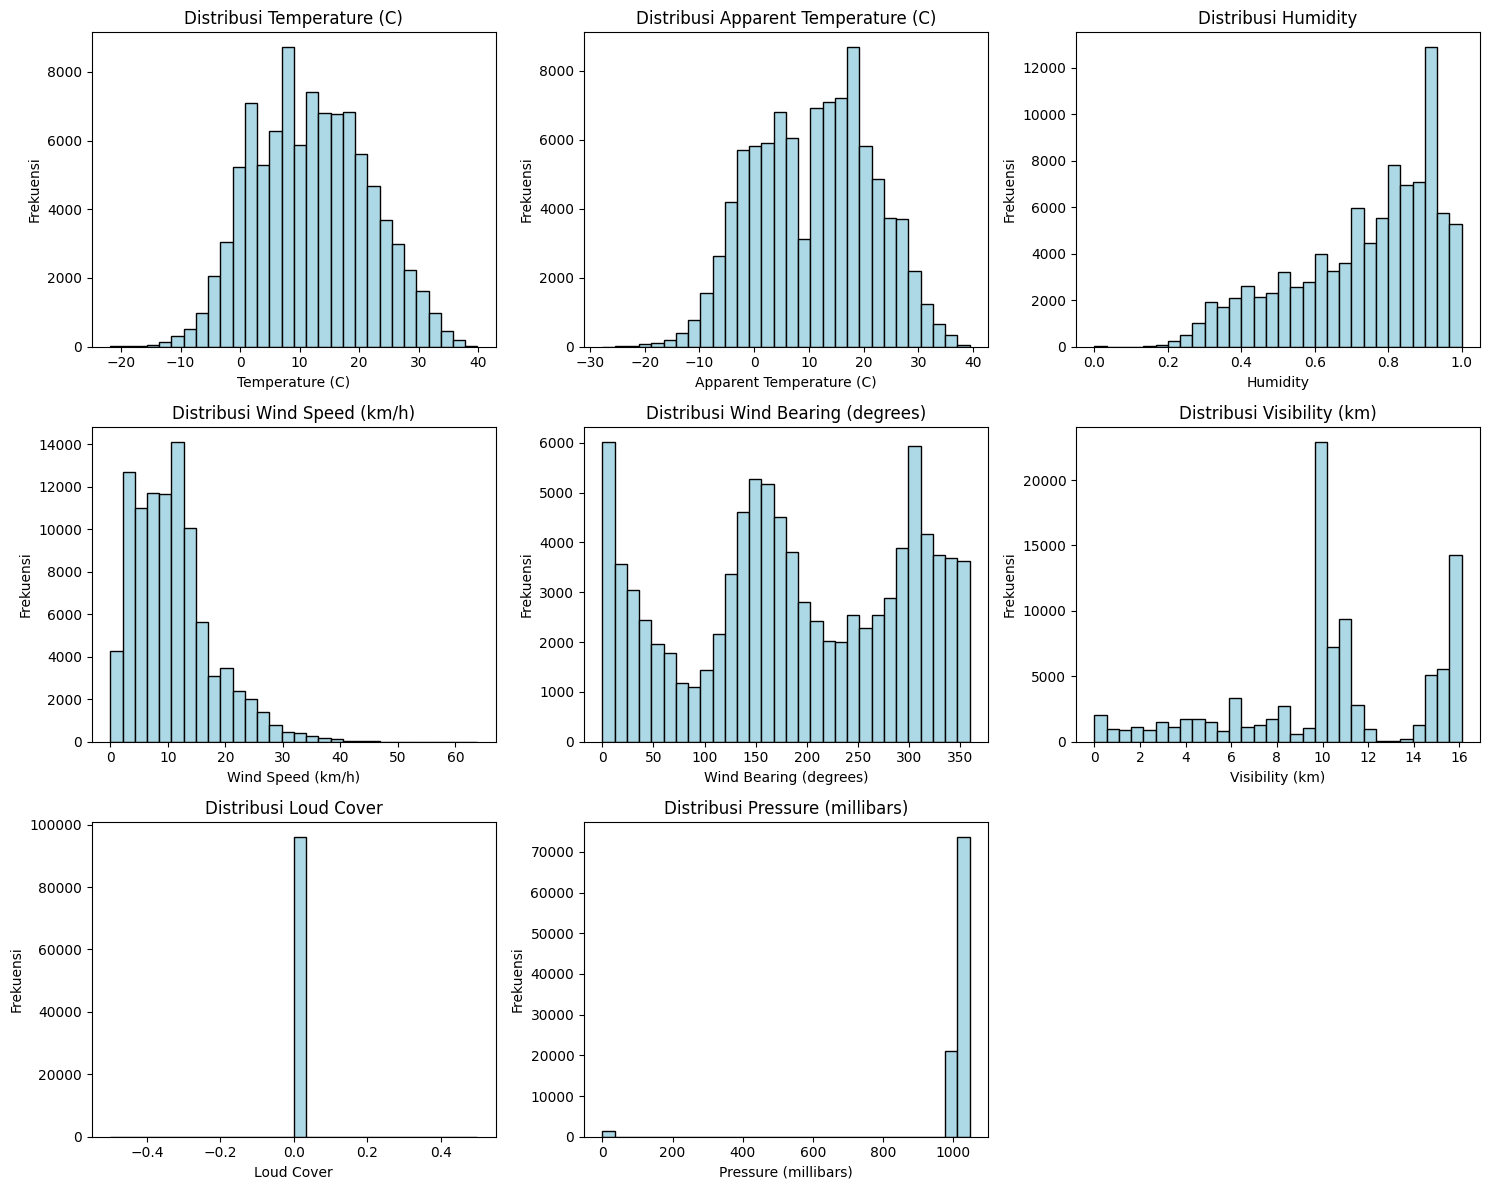

In [31]:
# Distribusi Data
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i + 1)
    plt.hist(X[feature], bins=30, color='lightblue', edgecolor='black')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Analisis korelasi antar fitur heatmap

In [ ]:
# Hitung korelasi antar fitur numerik
correlation_matrix = data.corr(numeric_only=True)

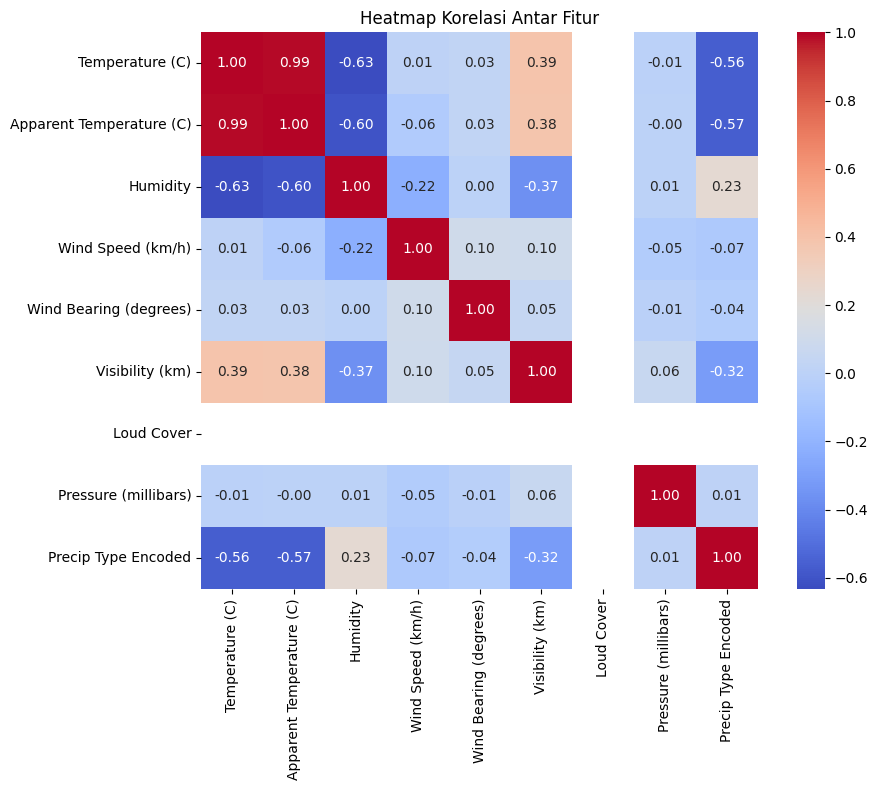

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi Antar Fitur')
plt.tight_layout()
plt.show()

Deteksi Data Tidak Seimbang (Imbalanced Classes)

In [ ]:
# Cek jumlah masing-masing kelas di kolom target 'Precip Type'
print("Distribusi Kelas pada Precip Type:")
print(data['Precip Type'].value_counts())

Distribusi Kelas pada Precip Type:
Precip Type
rain    85224
snow    10712
Name: count, dtype: int64


/tmp/ipython-input-29-2562785776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Precip Type', data=data, palette='Set2')


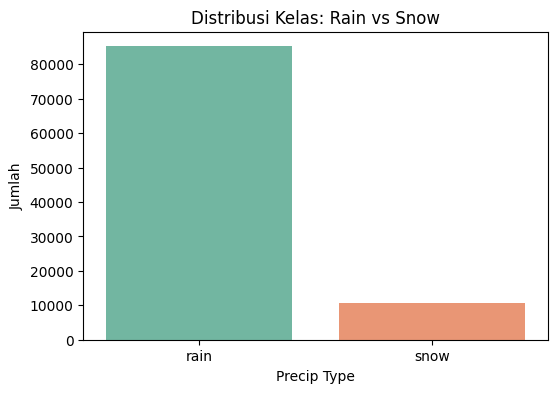

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Precip Type', data=data, palette='Set2')
plt.title('Distribusi Kelas: Rain vs Snow')
plt.xlabel('Precip Type')
plt.ylabel('Jumlah')
plt.show()

Melatih Model Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluasi Model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17090
           1       1.00      1.00      1.00      2098

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



Confusion Matrix

In [ ]:
m = confusion_matrix(y_test, y_pred)

In [ ]:
print(" Confusion Matrix:")
print(cm)

 Confusion Matrix:
[[17090     0]
 [    0  2098]]


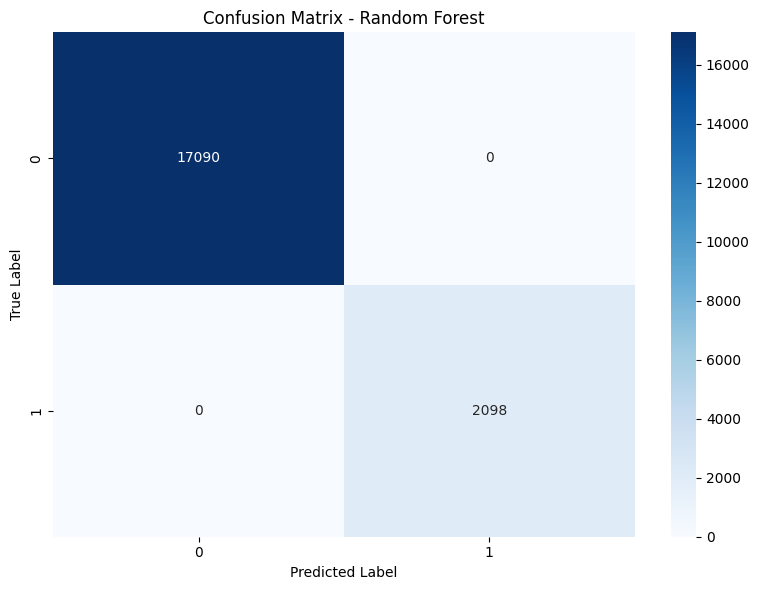

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

Visualisasi Distribusi Label

In [ ]:
data_compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [ ]:
# Hitung jumlah masing-masing label (0 = rain, 1 = snow)
actual_counts = data_compare['Actual'].value_counts().sort_index()
predicted_counts = data_compare['Predicted'].value_counts().sort_index()

In [ ]:
labels = le.classes_

In [ ]:
x = range(len(labels))

<BarContainer object of 2 artists>

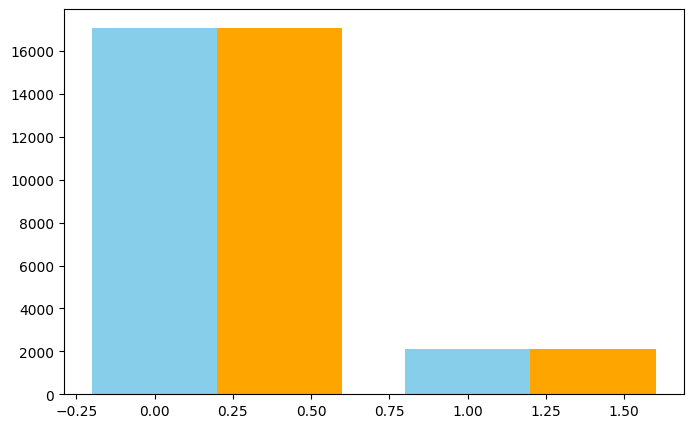

In [ ]:
# Buat bar chart
plt.figure(figsize=(8,5))
plt.bar(x, actual_counts, width=0.4, label='Actual', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], predicted_counts, width=0.4, label='Predicted', align='center', color='orange')
